In [4]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [5]:
def skew(a):
    mean = a.mean()
    skew = 0;
    for s in a:
        skew = skew +  pow((s-mean) , 3)
    skew = skew/(125 * pow(mean,3)) 
    return skew
def kurtosis(a):
    mean = a.mean()
    kurtosis = 0
    for s in a:
        kurtosis = kurtosis +  pow((s-mean) , 4)
    kurtosis = kurtosis/(125 * pow(mean , 4))
    return kurtosis

def autocorrelation(a,delta):
    mean = a.mean()
    autocorr = 0
    for i in range(125-delta-1):
        autocorr = autocorr + (a[i] - mean)*(a[i-delta] - mean)
    autocorr = autocorr/(125-delta)
    return autocorr

# Creating the dataset

There are 17 files for each action . Each action file contains report of data collected by 8 subjects for 5 min.
The 5 min signal is divided into 5-sec segments and hence each subject file contains 60 text files

# Feature Extraction and Reduction

Sensor units are calibrated to acquire data at 25 Hz sampling frequency.Therefore each 5-sec file contains 125(25 x 5) rows and there are 45 signals . We will calculate the 26 features from each signal (the minimum and maximum values, the mean value, variance, skewness, kurtosis ,10 equally spaced samples from the autocorrelation sequence, first five peaks of the discrete Fourier transform of the signal and the corresponding frequencies.)
Therefore 1170 features (26 x 45) are available for each 5-sec data.

In [6]:
def createDataSet(data ,label):
    feature = []
    feature.append(label)
    for sensor in range(45):
        a=data.iloc[:,sensor]
        b = a.values
        feature.append(b.mean())
        feature.append(b.max())
        feature.append(b.min())
        feature.append(b.var())
        feature.append(skew(b))
        feature.append(kurtosis(b))
        for delta in range(4,50,5):
            autocorr = autocorrelation(b,delta)
            feature.append(autocorr)

        dft_tuple = [] #contains tuple (corresponding freuency value and absolute(amplitude) value)
        w = np.fft.fft(b) # w is 1-d array which contains complex value
        n = w.size
        timestep = 0.1
        freq = np.fft.fftfreq(n, d=timestep)

        for i in range(n):
            amplitude = np.absolute(w[i])
            t = freq[i] , amplitude
            dft_tuple.append(t)
        def getKey(item):
               return item[1]
        sorted_dft = sorted(dft_tuple, key=getKey , reverse=True) 
        for i in range(5):
            feature.append(sorted_dft[i][1])
            feature.append(sorted_dft[i][0])
        
    
    features.append(feature)

In [7]:
features = []
actions_list = ["01" ,"02" ,"03" ,"04" ,"05" ,"06" ,"07" ,"08","09","10" ,"11","12" , "13" ,"14","15","16","17","18","19"]
for action in range(1,len(actions_list)+1):   
    files = ["1" , "2" , "3" , "4" , "5" , "6" , "7" ,"8"]
    for i in range(len(files)):
        path = '/home/rishabh/Desktop/data/a'+actions_list[action-1]+'/p' + files[i] 
        allFiles = glob.glob(path + "/*.txt")
        for file_ in allFiles:
            df = pd.read_csv(file_, header=None)
            createDataSet(df , action)

In [67]:
data = pd.DataFrame(features)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170
0,1,7.853220,8.0403,7.7421,0.003312,8.139955e-08,7.806299e-09,0.002317,0.001804,0.000980,...,7.081947,0.0,0.029245,-4.16,0.029245,4.16,0.023976,1.68,0.023976,-1.68
1,1,7.816842,8.0101,7.5940,0.003861,-1.599011e-07,1.759905e-08,0.000757,0.000221,0.000052,...,7.104146,0.0,0.024887,-4.16,0.024887,4.16,0.015679,3.60,0.015679,-3.60
2,1,7.849953,7.9959,7.6674,0.003886,-1.161333e-07,9.618751e-09,0.002868,0.002362,0.001806,...,7.117936,0.0,0.029664,-4.16,0.029664,4.16,0.016207,1.60,0.016207,-1.60
3,1,7.827027,7.9514,7.7495,0.001819,1.518773e-07,2.975760e-09,0.000853,0.000226,-0.000023,...,7.082094,0.0,0.026796,-4.16,0.026796,4.16,0.018275,2.16,0.018275,-2.16
4,1,7.902089,8.0484,7.8318,0.002262,1.483822e-07,3.445764e-09,0.001677,0.001205,0.000786,...,7.034098,0.0,0.021142,3.12,0.021142,-3.12,0.020064,1.68,0.020064,-1.68


there are total 9120 rows (19 action files x 8 subjects x 60 ) , 1170 features and 1 column for labelling action
We will shuffle the data

In [68]:
data_shuffle = shuffle(data)
data_shuffle.shape

(9120, 1171)

In [69]:
data_shuffle = data_shuffle.reset_index(drop=True)
print(data_shuffle.shape)
data_shuffle.head()

(9120, 1171)


,0,1,2,3,4,5,6,7,8,9,...,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170
0,2,8.975053,9.0604,8.90380,0.000807,-5.268407e-09,3.176030e-10,-0.000119,-0.000061,0.000141,...,71.621450,0.00,0.111450,-0.08,0.111450,0.08,0.096476,-3.44,0.096476,3.44
1,19,9.097255,33.5320,0.39675,29.987419,3.286544e-01,7.495386e-01,-12.157393,12.103997,-12.138289,...,25.824673,0.00,6.475590,0.08,6.475590,-0.08,3.289458,1.04,3.289458,-1.04
2,19,9.198778,13.0090,4.61200,2.186646,-8.194333e-04,2.729132e-03,-0.143267,-0.987137,0.724751,...,28.124299,0.08,28.124299,-0.08,24.096216,0.00,10.365046,0.24,10.365046,-0.24
3,3,-4.455015,-4.3885,-4.53000,0.000811,-1.587855e-08,4.546612e-09,0.000247,0.000041,-0.000147,...,80.262690,0.00,0.019876,2.00,0.019876,-2.00,0.015027,-2.64,0.015027,2.64
4,7,9.322954,9.4837,9.17720,0.003131,4.720862e-08,4.131560e-09,0.001282,0.000505,0.000407,...,35.648930,0.00,0.136231,-0.08,0.136231,0.08,0.103835,-0.32,0.103835,0.32


In [70]:
action_label = data_shuffle.iloc[:,0]
df = data_shuffle.drop(0 , axis = 1)
print("Action Label\n")
print(action_label.head())
print("\n\nFeatures Vector\n")
df.head()

Action Label

0     2
1    19
2    19
3     3
4     7
Name: 0, dtype: int64


Features Vector



,1,2,3,4,5,6,7,8,9,10,...,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170
0,8.975053,9.0604,8.90380,0.000807,-5.268407e-09,3.176030e-10,-0.000119,-0.000061,0.000141,-0.000225,...,71.621450,0.00,0.111450,-0.08,0.111450,0.08,0.096476,-3.44,0.096476,3.44
1,9.097255,33.5320,0.39675,29.987419,3.286544e-01,7.495386e-01,-12.157393,12.103997,-12.138289,10.795115,...,25.824673,0.00,6.475590,0.08,6.475590,-0.08,3.289458,1.04,3.289458,-1.04
2,9.198778,13.0090,4.61200,2.186646,-8.194333e-04,2.729132e-03,-0.143267,-0.987137,0.724751,0.349960,...,28.124299,0.08,28.124299,-0.08,24.096216,0.00,10.365046,0.24,10.365046,-0.24
3,-4.455015,-4.3885,-4.53000,0.000811,-1.587855e-08,4.546612e-09,0.000247,0.000041,-0.000147,-0.000230,...,80.262690,0.00,0.019876,2.00,0.019876,-2.00,0.015027,-2.64,0.015027,2.64
4,9.322954,9.4837,9.17720,0.003131,4.720862e-08,4.131560e-09,0.001282,0.000505,0.000407,0.000008,...,35.648930,0.00,0.136231,-0.08,0.136231,0.08,0.103835,-0.32,0.103835,0.32


Normalize the faeures between 0 and 1

In [71]:
scalar = MinMaxScaler()
scalar.fit(df)
normalize_data = scalar.fit_transform(df)
normalize_data = pd.DataFrame(normalize_data)
normalize_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169
0,0.922020,0.140363,0.992279,0.000002,0.998859,1.579678e-16,0.703870,0.319250,0.384407,0.524155,...,0.561227,0.482759,0.002373,0.491935,0.003031,0.508065,0.004071,0.153226,0.004071,0.846774
1,0.927502,0.388925,0.914563,0.076939,0.998877,4.105081e-07,0.650917,0.350011,0.347964,0.551673,...,0.202173,0.482759,0.153918,0.508065,0.196622,0.491935,0.156345,0.604839,0.156345,0.395161
2,0.932057,0.180469,0.953071,0.005610,0.998859,1.494694e-09,0.703247,0.316741,0.386583,0.525047,...,0.220203,0.517241,0.669426,0.491935,0.732624,0.500000,0.493781,0.524194,0.493781,0.475806
3,0.319472,0.003760,0.869555,0.000002,0.998859,2.474116e-15,0.703872,0.319250,0.384406,0.524155,...,0.628976,0.482759,0.000192,0.701613,0.000245,0.298387,0.000187,0.233871,0.000187,0.766129
4,0.937629,0.144662,0.994776,0.000008,0.998859,2.246800e-15,0.703876,0.319251,0.384408,0.524155,...,0.279197,0.482759,0.002963,0.491935,0.003785,0.508065,0.004422,0.467742,0.004422,0.532258


Reduce the no of features from 1170 to 30 using Principal Component analysis.PCA finds the optimal linear combination of features.

In [72]:
pca = PCA(n_components=30)
pca.fit(normalize_data)
data_pca = pca.fit_transform(normalize_data)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.717177,-1.345483,-0.391148,0.270358,0.443170,-0.220433,0.298038,0.030682,-0.439846,-0.400033,...,0.000157,0.010159,-0.332176,-0.485246,-0.384351,0.130674,-0.277621,-0.354243,-0.531093,-0.196840
1,3.566172,0.088369,1.025942,0.514836,0.115613,-0.324911,-0.274329,0.259029,-0.406652,0.313823,...,0.324471,-0.471607,-0.082881,0.284701,-0.048484,-0.060702,-0.430484,0.133573,0.018045,-0.317862
2,2.425042,-0.936353,2.525983,-1.287767,0.472770,0.212993,-1.042902,-0.097716,-0.189788,-0.027738,...,0.673283,0.388040,0.117269,-0.224207,0.388590,-0.160087,0.264431,-0.154309,-0.180366,0.254605
3,-2.434607,1.199726,0.403591,0.672734,0.882066,-0.264805,0.254908,0.606740,-0.468513,0.096076,...,-0.405729,-0.016605,-0.538968,-0.317582,-0.054061,-0.594224,0.279807,-0.161984,0.192025,-0.348824
4,-1.720747,-1.098305,-0.273303,0.291967,0.371845,-0.288964,0.521454,0.120185,-0.485048,-0.409041,...,0.022419,0.055590,-0.072020,0.000686,-0.049594,-0.334372,-0.157305,0.058561,0.063351,0.050046


Split the data into training data(70%) and testing data(30%)

In [79]:
from sklearn.model_selection import train_test_split
#Split the training data to  training and testing data for cross_validation 
x_train,x_test,y_train,y_test = train_test_split(data_pca , action_label , test_size = 0.3)

# Classification

# Random Forest Classifier

In [80]:
#Using Random Forest Classifier Model to train the data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100 , min_samples_leaf=20 , n_jobs=-1)
rfc.fit(x_train , y_train)
score = rfc.score(x_test , y_test)
score

0.98099415204678364

In [81]:
target_names = []
for i in range(1,20):
    target_names.append("action" +  str(i))

In [82]:
y_pred = rfc.predict(x_test)
y_true = y_test

In [83]:
#Printing classification Report
from sklearn import metrics
print(metrics.classification_report(y_true , y_pred ,target_names=target_names))

             precision    recall  f1-score   support

    action1       1.00      0.99      1.00       135
    action2       0.99      0.99      0.99       149
    action3       0.99      0.99      0.99       141
    action4       1.00      1.00      1.00       154
    action5       1.00      1.00      1.00       134
    action6       0.99      1.00      1.00       136
    action7       0.84      0.94      0.89       145
    action8       0.93      0.79      0.85       145
    action9       0.97      1.00      0.99       145
   action10       0.99      1.00      1.00       149
   action11       1.00      0.99      1.00       147
   action12       1.00      1.00      1.00       164
   action13       0.99      0.99      0.99       133
   action14       1.00      1.00      1.00       141
   action15       1.00      1.00      1.00       126
   action16       0.99      0.97      0.98       150
   action17       1.00      1.00      1.00       160
   action18       1.00      1.00      1.00   

In [84]:
# Printing Confusion Matrix
#In confusion matrix diagnol element represent correct prediction and all other element represents wrong predicion
print(metrics.confusion_matrix(y_true , y_pred))

[[134   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 147   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 140   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1]
 [  0   0   0 154   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 134   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0 136   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   2   0   0   0   0 137   6   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   1  25 114   0   0   0   0   0   0   0   0   0   0
    5]
 [  0   0   0   0   0   0   0   0 145   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0 149   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   1 146   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0 164   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

# K - Nearest Neighbor Classifier

In [85]:
#Using K neighbor Classifier model to train the data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(weights='distance')
KNN.fit(x_train , y_train)
score = KNN.score(x_test , y_test)
score

0.98574561403508776

In [86]:
y_pred = KNN.predict(x_test)
y_true = y_test

In [87]:
#Printing classification Report
print(metrics.classification_report(y_true , y_pred ,target_names=target_names))

             precision    recall  f1-score   support

    action1       0.99      1.00      1.00       135
    action2       0.98      0.97      0.98       149
    action3       1.00      0.99      0.99       141
    action4       1.00      1.00      1.00       154
    action5       1.00      1.00      1.00       134
    action6       0.99      0.99      0.99       136
    action7       0.85      0.93      0.89       145
    action8       0.93      0.86      0.90       145
    action9       1.00      1.00      1.00       145
   action10       1.00      1.00      1.00       149
   action11       1.00      1.00      1.00       147
   action12       1.00      1.00      1.00       164
   action13       1.00      1.00      1.00       133
   action14       1.00      1.00      1.00       141
   action15       1.00      1.00      1.00       126
   action16       1.00      1.00      1.00       150
   action17       0.99      1.00      1.00       160
   action18       1.00      0.99      1.00   

In [88]:
#Printing Confusion Matrix
#In confusion matrix diagnol element represent correct prediction and all other element represents wrong predicion
print(metrics.confusion_matrix(y_true , y_pred))

[[135   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 145   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  1   0 139   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0]
 [  0   0   0 154   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 134   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0 135   0   1   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   3   0   0   0   0 135   7   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0  20 125   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0 145   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0 149   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0 147   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0 164   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

In [ ]:
X = x_train.as_matrix()
X = X[:,:2]
y = y_train
h=0.02
KNN.fit(X, y)
cmap_light = ListedColormap(['#dffed1', '#fde5e8' ,'#fbf0f6' ,'#fdeeec' ,'#cfcf94' ,'#e4e4f8' ,'#f9db94' ,'#dccce5' ,'#ad97ff' ,'#f5fadf' ,'#d8f574' ,'#b7f3e2' ,'#c7caa8' ,'#fef8d9','#fcead4','#f5e2e1','#e4a57a','#c2e5b7','#ed98dc'])
cmap_bold = ListedColormap(['#6cfb2a',  '#f33548' ,'#d15fa4' ,'#66180d' ,'#b9ba65' ,'#4141cf' ,'#f3b623' ,'#9667b2' ,'#5c31ff' ,'#0b0d02' ,'#c6f035' ,'#43dfb4' ,'#abb07e','#fbe676','#f39b34','#cc6660','#db8850','#6fc054','#e14fc4' ])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z ,cmap = cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold , s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classification Boundaries using KNN classifier")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

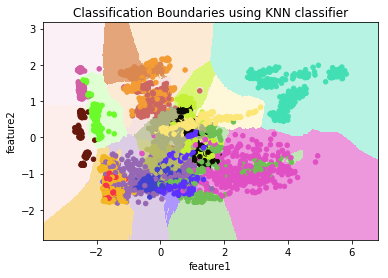

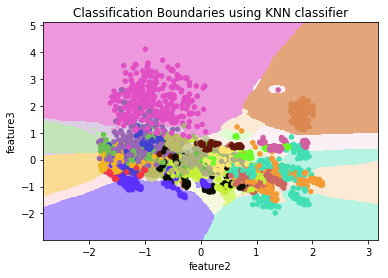

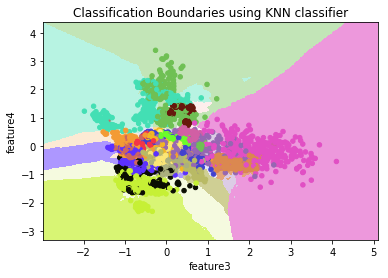

In [93]:
X = x_train.as_matrix()
cmap_light = ListedColormap(['#dffed1', '#fde5e8' ,'#fbf0f6' ,'#fdeeec' ,'#cfcf94' ,'#e4e4f8' ,'#f9db94' ,'#dccce5' ,'#ad97ff' ,'#f5fadf' ,'#d8f574' ,'#b7f3e2' ,'#c7caa8' ,'#fef8d9','#fcead4','#f5e2e1','#e4a57a','#c2e5b7','#ed98dc'])
cmap_bold = ListedColormap(['#6cfb2a',  '#f33548' ,'#d15fa4' ,'#66180d' ,'#b9ba65' ,'#4141cf' ,'#f3b623' ,'#9667b2' ,'#5c31ff' ,'#0b0d02' ,'#c6f035' ,'#43dfb4' ,'#abb07e','#fbe676','#f39b34','#cc6660','#db8850','#6fc054','#e14fc4' ])
X_list = []
X1 = X[:,:2]
X_list.append(X1)
X2 = X[:,1:3]
X_list.append(X2)
X3 = X[:,2:4]
X_list.append(X3)
y = y_train
h=0.02
for i in range(len(X_list)):
    X = X_list[i]
    KNN.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z ,cmap = cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold , s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Classification Boundaries using KNN classifier")
    plt.xlabel("feature" + str(i+1))
    plt.ylabel("feature" + str(i+2))
plt.show()

# Using Supprt Vector Machine as classifier

In [28]:
#Using SVM model to train the data
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train , y_train)
score = svc.score(x_test , y_test)
score

0.98538011695906436

In [29]:
y_pred = svc.predict(x_test)
y_true = y_test

In [30]:
#Printing classification Report
print(metrics.classification_report(y_true , y_pred ,target_names=target_names))

             precision    recall  f1-score   support

    action1       1.00      1.00      1.00       130
    action2       0.97      1.00      0.99       133
    action3       1.00      1.00      1.00       134
    action4       1.00      1.00      1.00       161
    action5       1.00      1.00      1.00       149
    action6       1.00      1.00      1.00       151
    action7       0.81      0.96      0.88       137
    action8       0.97      0.77      0.86       136
    action9       1.00      1.00      1.00       144
   action10       1.00      1.00      1.00       129
   action11       1.00      1.00      1.00       133
   action12       1.00      1.00      1.00       140
   action13       0.99      0.99      0.99       151
   action14       1.00      1.00      1.00       154
   action15       1.00      1.00      1.00       155
   action16       1.00      1.00      1.00       152
   action17       1.00      1.00      1.00       150
   action18       1.00      1.00      1.00   

In [31]:
#Printing Confusion Matrix
#In confusion matrix diagnol element represent correct prediction and all other element represents wrong predicion
print(metrics.confusion_matrix(y_true , y_pred))

[[130   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 133   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 134   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0 161   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 149   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0 151   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   3   0   0   0   0 132   2   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   1   0   0   0   0  30 105   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0 144   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0 129   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0 133   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0 140   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

# Gaussian Naive Bayes Classifier

In [32]:
#Using Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
score = gnb.score(x_test , y_test)
score

0.94700292397660824

In [33]:
y_pred = gnb.predict(x_test)
y_true = y_test

In [34]:
#Printing classification Report
print(metrics.classification_report(y_true , y_pred ,target_names=target_names))

             precision    recall  f1-score   support

    action1       0.98      0.93      0.96       130
    action2       0.93      0.98      0.96       133
    action3       0.94      1.00      0.97       134
    action4       1.00      1.00      1.00       161
    action5       0.97      1.00      0.99       149
    action6       0.91      0.99      0.95       151
    action7       0.73      0.85      0.79       137
    action8       0.93      0.65      0.77       136
    action9       0.98      0.90      0.93       144
   action10       0.80      0.91      0.86       129
   action11       0.91      0.86      0.89       133
   action12       1.00      1.00      1.00       140
   action13       0.99      1.00      0.99       151
   action14       1.00      1.00      1.00       154
   action15       1.00      1.00      1.00       155
   action16       1.00      0.96      0.98       152
   action17       1.00      1.00      1.00       150
   action18       0.96      0.91      0.94   

In [35]:
#Printing Confusion Matrix
#In confusion matrix diagnol element represent correct prediction and all other element represents wrong predicion
print(metrics.confusion_matrix(y_true , y_pred))

[[121   0   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 131   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 134   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0 161   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 149   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0 149   0   0   0   0   0   0   0   0   0   0   0   2
    0]
 [  2   8   0   0   0   0 117   7   0   0   0   0   0   0   0   0   0   3
    0]
 [  0   2   0   0   0   2  41  89   0   0   0   0   0   0   0   0   0   0
    2]
 [  0   0   0   0   4   0   0   0 129  11   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0 118  11   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0  18 115   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0 140   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

# Using Neural Network 

In [49]:
from sklearn.neural_network import MLPClassifier

Using Neuaral Network with 30 input neurons(features) , one hidden layer with 12 neurons and 19 output neurons.
We used logistic sigmoid function (f(x) = 1 / (1 + exp(-x))) as the activation function .We used Adam optimizer as solver for weight optimization.

In [62]:
clf = MLPClassifier(activation='logistic' ,  solver='adam', alpha=1e-4 , 
                    batch_size = 'auto' , hidden_layer_sizes=(12, ), random_state=1 ,max_iter=500)
clf.fit(x_train , y_train)
score = clf.score(x_test , y_test)
score

0.98355263157894735

In [63]:
y_true = y_test
y_pred = clf.predict(x_test)

In [64]:
#Printing classification Report
print(metrics.classification_report(y_true , y_pred ,target_names=target_names))

             precision    recall  f1-score   support

    action1       1.00      1.00      1.00       130
    action2       0.98      0.98      0.98       133
    action3       1.00      1.00      1.00       134
    action4       1.00      1.00      1.00       161
    action5       1.00      1.00      1.00       149
    action6       0.99      1.00      0.99       151
    action7       0.82      0.93      0.87       137
    action8       0.93      0.78      0.85       136
    action9       1.00      1.00      1.00       144
   action10       1.00      1.00      1.00       129
   action11       1.00      1.00      1.00       133
   action12       0.99      1.00      1.00       140
   action13       0.99      0.99      0.99       151
   action14       1.00      0.99      1.00       154
   action15       1.00      1.00      1.00       155
   action16       1.00      1.00      1.00       152
   action17       1.00      1.00      1.00       150
   action18       1.00      1.00      1.00   

In [65]:
#Printing Confusion Matrix
#In confusion matrix diagnol element represent correct prediction and all other element represents wrong predicion
print(metrics.confusion_matrix(y_true , y_pred))

[[130   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 131   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 134   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0 161   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 149   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0 151   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   2   0   0   0   0 128   7   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   2  27 106   0   0   0   0   0   0   0   0   0   0
    1]
 [  0   0   0   0   0   0   0   0 144   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0 129   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0 133   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0 140   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

# Conclusion

Observing the confusion matrix , we observed that activity7 and activity8 are the most confusing activities
All classification method (Random Forest Classifier  , K-NN , SVM , Neural Network) gave almost similar kind of result except Gaussian Naive Bayes which gives around 94% accuracy whereas in all other methods , the accuracy was around 98%. 